In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding
from tensorflow.keras.models import Sequential

In [7]:
dataset_path = "SMSSpamCollection"
df = pd.read_csv(dataset_path, sep='\t', header=None, names=['label', 'message'], encoding='utf-8')
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [9]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['message'])
sequences=tokenizer.texts_to_sequences(df['message'])
maxlength=max([len(x) for x in sequences])
padded_sequences=pad_sequences(sequences,maxlen=maxlength)

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(padded_sequences,df['label'],test_size=0.2,random_state=42)

In [13]:
vocal_length=len(tokenizer.word_index)+1

In [15]:
model=Sequential([
    Embedding(input_dim=vocal_length,output_dim=16,input_length=maxlength),
    SimpleRNN(64,return_sequences=True),
    SimpleRNN(32),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\K.G.LAKSSAN\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(xtrain,ytrain,epochs=5,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.8702 - loss: 0.3081 - val_accuracy: 0.9839 - val_loss: 0.0580
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9830 - loss: 0.0640 - val_accuracy: 0.9821 - val_loss: 0.0550
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9949 - loss: 0.0233 - val_accuracy: 0.9883 - val_loss: 0.0469
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9965 - loss: 0.0138 - val_accuracy: 0.9892 - val_loss: 0.0394
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9919 - val_loss: 0.0336


In [21]:
ypred=(model.predict(xtest)>0.5).astype("int32")

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [23]:
print(accuracy_score(ytest,ypred))

0.9919282511210762


In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       0.98      0.96      0.97       149

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [27]:
def predict_seq(message):
    seq=tokenizer.texts_to_sequences(message)
    padded_seq=pad_sequences(seq,maxlen=maxlength,padding='post')
    prediction=model.predict(padded_seq)[0][0]
    return "spam" if prediction>0.5 else "ham"

In [29]:
print(predict_seq("Congratulations! You've won a free gift."))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
ham


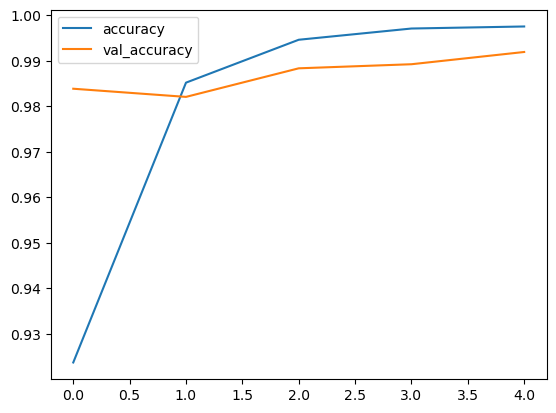

In [33]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

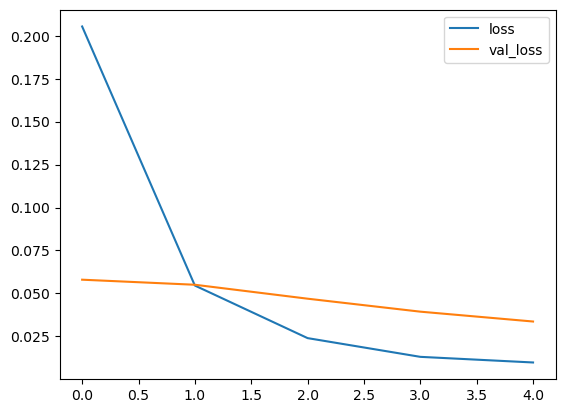

In [35]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()